In [1]:
import requests
import os

In [2]:
from conf import databases, url, data_dir

In [22]:
download_file('https://physionet.org/physiobank/database/mitdb/212.hea', data_dir + '/mitdb/212.hea')

In [5]:
def download_file(url, path):
    if os.path.isfile(path):
        return
    
    r = requests.get(url, stream=True)
    if r.status_code == 200:
        with open(path, 'wb') as f:
            for chunk in r.iter_content(1024):
                f.write(chunk)

for db, ids in databases:
    if not os.path.exists(data_dir + db):
        os.makedirs(data_dir + db)
    for i in ids:
        for ext in ['dat', 'hea', 'atr']:
            fp = db + '/' + i + '.' + ext
            print(fp)
            download_file(url + fp, data_dir + fp)

mitdb/100.dat
mitdb/100.hea
mitdb/100.atr
mitdb/101.dat
mitdb/101.hea
mitdb/101.atr
mitdb/102.dat
mitdb/102.hea
mitdb/102.atr
mitdb/103.dat
mitdb/103.hea
mitdb/103.atr
mitdb/104.dat
mitdb/104.hea
mitdb/104.atr
mitdb/105.dat
mitdb/105.hea
mitdb/105.atr
mitdb/106.dat
mitdb/106.hea
mitdb/106.atr
mitdb/107.dat
mitdb/107.hea
mitdb/107.atr
mitdb/108.dat
mitdb/108.hea
mitdb/108.atr
mitdb/109.dat
mitdb/109.hea
mitdb/109.atr
mitdb/111.dat
mitdb/111.hea
mitdb/111.atr
mitdb/112.dat
mitdb/112.hea
mitdb/112.atr
mitdb/113.dat
mitdb/113.hea
mitdb/113.atr
mitdb/114.dat
mitdb/114.hea
mitdb/114.atr
mitdb/115.dat
mitdb/115.hea
mitdb/115.atr
mitdb/116.dat
mitdb/116.hea
mitdb/116.atr
mitdb/117.dat
mitdb/117.hea
mitdb/117.atr
mitdb/118.dat
mitdb/118.hea
mitdb/118.atr
mitdb/119.dat
mitdb/119.hea
mitdb/119.atr
mitdb/121.dat
mitdb/121.hea
mitdb/121.atr
mitdb/122.dat
mitdb/122.hea
mitdb/122.atr
mitdb/123.dat
mitdb/123.hea
mitdb/123.atr
mitdb/124.dat
mitdb/124.hea
mitdb/124.atr
mitdb/200.dat
mitdb/200.hea
mitdb/

In [7]:
import wfdb
import numpy
import json

In [4]:
for db, ids in databases:
    for i in ids:
        f = data_dir + db + '/' + i
        print(f)
        sig, fields = wfdb.srdsamp(f)
        ann = wfdb.rdann(f, 'atr')
        tmp = numpy.stack([
            ann.annsamp, 
            numpy.asarray(ann.anntype), 
            ann.subtype, 
            ann.chan, 
            ann.num, 
            numpy.asarray(ann.aux)
        ])
        with open(f + '.json', 'w+') as f:
            json.dump(fields, f)

data/mitdb/100
data/mitdb/101
data/mitdb/102
data/mitdb/103
data/mitdb/104
data/mitdb/105
data/mitdb/106
data/mitdb/107
data/mitdb/108
data/mitdb/109
data/mitdb/111
data/mitdb/112
data/mitdb/113
data/mitdb/114
data/mitdb/115
data/mitdb/116
data/mitdb/117
data/mitdb/118
data/mitdb/119
data/mitdb/121
data/mitdb/122
data/mitdb/123
data/mitdb/124
data/mitdb/200
data/mitdb/201
data/mitdb/202
data/mitdb/203
data/mitdb/205
data/mitdb/207
data/mitdb/208
data/mitdb/209
data/mitdb/210
data/mitdb/212
data/mitdb/213
data/mitdb/214
data/mitdb/215
data/mitdb/217
data/mitdb/219
data/mitdb/220
data/mitdb/221
data/mitdb/222
data/mitdb/223
data/mitdb/228
data/mitdb/230
data/mitdb/231
data/mitdb/232
data/mitdb/233
data/mitdb/234
data/afdb/04015
data/afdb/04043
data/afdb/04048
data/afdb/04126
data/afdb/04746
data/afdb/04908
data/afdb/04936
data/afdb/05091
data/afdb/05121
data/afdb/05261
data/afdb/06426
data/afdb/06453
data/afdb/06995
data/afdb/07162
data/afdb/07859
data/afdb/07879
data/afdb/07910
data/afd

None annsamp [  18   77  370  662  946 1231 1515 1809 2044 2402 2706 2998 3282 3560 3862
 4170 4466 4764 5060 5346 5633 5918 6214 6527 6823 7106 7391 7670 7953 8245
 8539 8837 9141 9431 9710 9998] anntype ['+', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N'] subtype [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


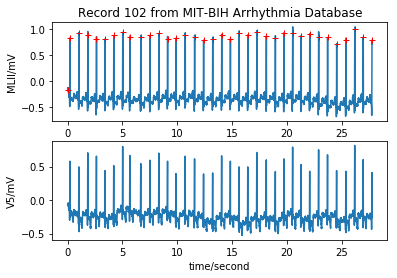

In [15]:
f = 'data/mitdb/100'
sig, fields = wfdb.srdsamp(f)
record = wfdb.rdsamp(f, sampfrom=0, sampto=10000)
ann = wfdb.rdann(f, 'atr', sampfrom=0, sampto=10000)
print(ann.fs, 'annsamp', ann.annsamp, 'anntype', ann.anntype)
wfdb.plotrec(record, annotation=ann, title='Record 102 from MIT-BIH Arrhythmia Database', timeunits='seconds')

In [32]:
tmp = {}
l = 0

db, ids = databases[0]
for i in ids:
    f = data_dir + db + '/' + i
    record = wfdb.rdsamp(f)
    ann = wfdb.rdann(f, 'atr')
    for v in ann.chan:
        s = record.signame[v]
        if s not in tmp:
            tmp[s] = 0
        tmp[s] += 1
print(tmp)
print(l)


{'MLII': 106254, 'V5': 6393}
31200000
